# Data Wrangling

## Part 1: Discovering


In [ ]:
import pandas as pd
import numpy as np

# Load the csv file
loan_approval_df = pd.read_csv("loan_data.csv")
# Print the shape
print("Shape: ")
print(loan_approval_df.shape)
print("\n")
# Print the head
print("Head: ")
print(loan_approval_df.head())
print("\n")
# Describe the dataframe
print("Description: ")
print(loan_approval_df.describe())
print("\n")
# Display the columns
print("Columns: ")
all_columns = loan_approval_df.columns.tolist()
print(all_columns)
print("\n")


Shape: 
(45000, 14)


Head: 
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49               

## Part 2: Structuring

In [ ]:
# Add column "id" if it doesn't exist
if not ("id" in all_columns):
  all_columns = ["id"] + all_columns
  loan_approval_df = loan_approval_df.reindex(columns=all_columns)
  loan_approval_df["id"] = loan_approval_df.index + 1
loan_approval_df

,id,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,1,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,2,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,3,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,4,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,5,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,44996,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,44997,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,44998,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,44999,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
loan_approval_df.rename(columns={'person_age': 'age',
                                 'person_gender': 'gender',
                                 'person_education': 'education',
                                 'person_income': 'annual_income',
                                 'person_emp_exp': 'years_of_employment',
                                 'person_home_ownership': 'home_ownership_status',
                                 'cb_person_cred_hist_length': 'years_of_credit_hist',
                                 'previous_loan_defaults_on_file': 'previous_loan_defaults'}, inplace=True)
loan_approval_df

,id,age,gender,education,annual_income,years_of_employment,home_ownership_status,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,years_of_credit_hist,credit_score,previous_loan_defaults,loan_status
0,1,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,2,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,3,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,4,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,5,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,44996,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,44997,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,44998,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,44999,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## Part 3: Cleaning

In [ ]:
# Display the number of null values in each feature
null_counts = loan_approval_df.isnull().sum()
print("Number of Null Values in Each Feature:")
print(null_counts)
print("\n")

# Check for duplicate rows
loan_approval_df_no_id = loan_approval_df.drop(columns=['id'])
duplicate_rows_no_id = loan_approval_df_no_id[loan_approval_df_no_id.duplicated()]
print("Duplicate Rows (excluding 'id' column):")
print(duplicate_rows_no_id)

# Check for non-unique values
print("Print non-unique (duplicate) values:")
duplicate_counts = []
for column in loan_approval_df.columns:
    total_values = loan_approval_df[column].count()
    unique_values = loan_approval_df[column].nunique()
    duplicate_values = total_values - unique_values
    duplicate_counts.append([column, total_values, unique_values, duplicate_values])
duplicate_df = pd.DataFrame(duplicate_counts, columns=['Feature', 'Total Values', 'Unique Values', 'Duplicate Values'])
print(duplicate_df)
print("\n")

# Drop any null values
loan_approval_df.dropna()

Number of Null Values in Each Feature:
id                        0
age                       0
gender                    0
education                 0
annual_income             0
years_of_employment       0
home_ownership_status     0
loan_amnt                 0
loan_intent               0
loan_int_rate             0
loan_percent_income       0
years_of_credit_hist      0
credit_score              0
previous_loan_defaults    0
loan_status               0
dtype: int64


Duplicate Rows (excluding 'id' column):
Empty DataFrame
Columns: [age, gender, education, annual_income, years_of_employment, home_ownership_status, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, years_of_credit_hist, credit_score, previous_loan_defaults, loan_status]
Index: []
Print non-unique (duplicate) values:
                   Feature  Total Values  Unique Values  Duplicate Values
0                       id         45000          45000                 0
1                      age         45000         

,id,age,gender,education,annual_income,years_of_employment,home_ownership_status,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,years_of_credit_hist,credit_score,previous_loan_defaults,loan_status
0,1,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,2,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,3,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,4,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,5,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,44996,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,44997,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,44998,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,44999,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
# Make age an integer instead of float
loan_approval_df['age'] = loan_approval_df['age'].astype(int)
# Make gender 'M' or 'F' instead of full words
loan_approval_df['gender'] = loan_approval_df['gender'].astype(str)
loan_approval_df['gender'] = loan_approval_df['gender'].replace({'male': 'M', 'female': 'F'})
# Make previous_loan_defaults 0 or 1
loan_approval_df['previous_loan_defaults'] = loan_approval_df['previous_loan_defaults'].astype(str)
loan_approval_df['previous_loan_defaults'] = loan_approval_df['previous_loan_defaults'].replace({'No': '0', 'Yes': '1'})
loan_approval_df['previous_loan_defaults'] = loan_approval_df['previous_loan_defaults'].astype(int)
# Print the df
loan_approval_df

,id,age,gender,education,annual_income,years_of_employment,home_ownership_status,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,years_of_credit_hist,credit_score,previous_loan_defaults,loan_status
0,1,22,F,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,2,21,F,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,3,25,F,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,4,23,F,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,5,24,M,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,44996,27,M,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,0,1
44996,44997,37,F,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,0,1
44997,44998,33,M,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,0,1
44998,44999,29,M,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,0,1


## Part 4: Vizualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loan_approvals = loan_approval_df['loan_status'].value_counts()
print(loan_approvals)

loan_status
0    35000
1    10000
Name: count, dtype: int64


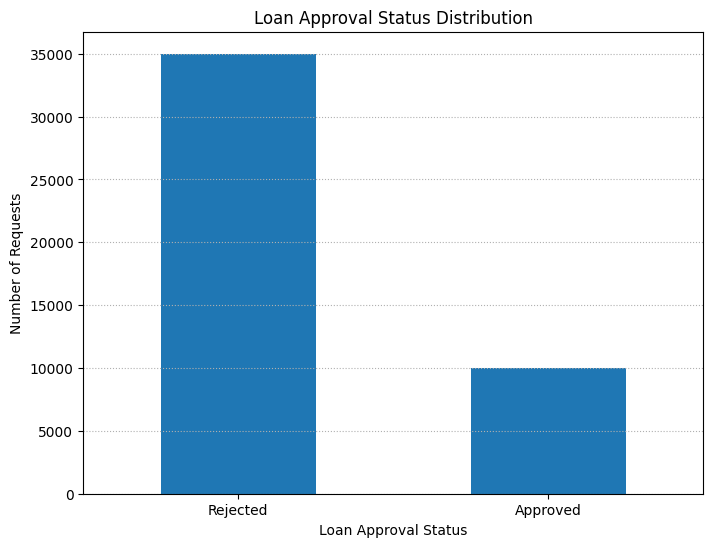

In [ ]:
# Plot the distribution of loan approval status
plt.figure(figsize=(8, 6))
loan_approvals.plot(kind='bar')
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Approval Status')
plt.xticks([0, 1], ['Rejected', 'Approved'], rotation=0)
plt.ylabel('Number of Requests')
plt.grid(axis='y', linestyle=':')
plt.show()

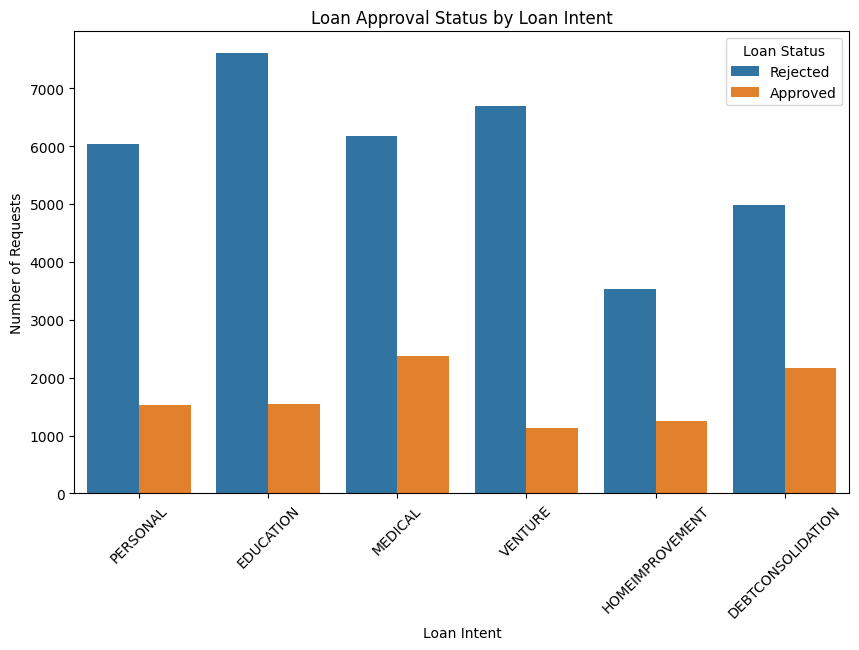

In [ ]:
# Plot the distribution of loan approval status based on loan_intent
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_approval_df, x='loan_intent', hue='loan_status')
plt.title('Loan Approval Status by Loan Intent')
plt.xlabel('Loan Intent')
plt.xticks(rotation=45)
plt.ylabel('Number of Requests')
labels = ['Rejected', 'Approved']
plt.legend(labels, title='Loan Status', loc='upper right')
plt.show()

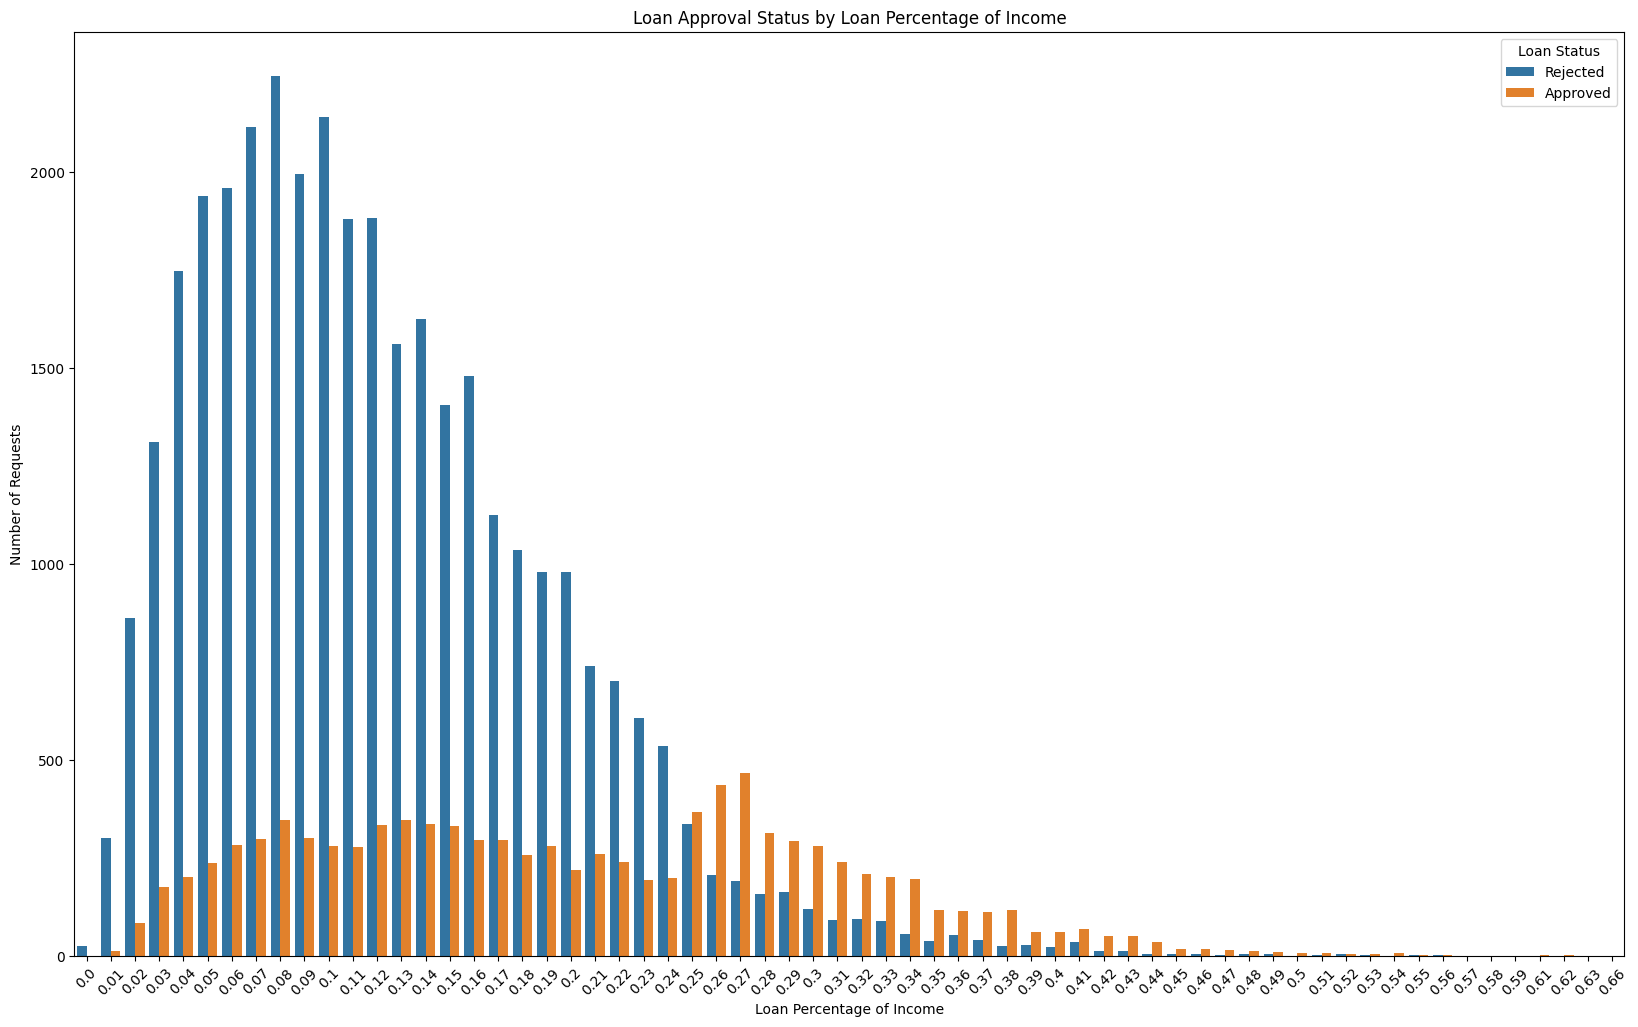

In [ ]:
# Plot the distribution of loan approval status based on loan_percent_income
plt.figure(figsize=(20, 12))
sns.countplot(data=loan_approval_df, x='loan_percent_income', hue='loan_status')
plt.title('Loan Approval Status by Loan Percentage of Income')
plt.xlabel('Loan Percentage of Income')
plt.xticks(rotation=45)
plt.ylabel('Number of Requests')
labels = ['Rejected', 'Approved']
plt.legend(labels, title='Loan Status', loc='upper right')
plt.show()

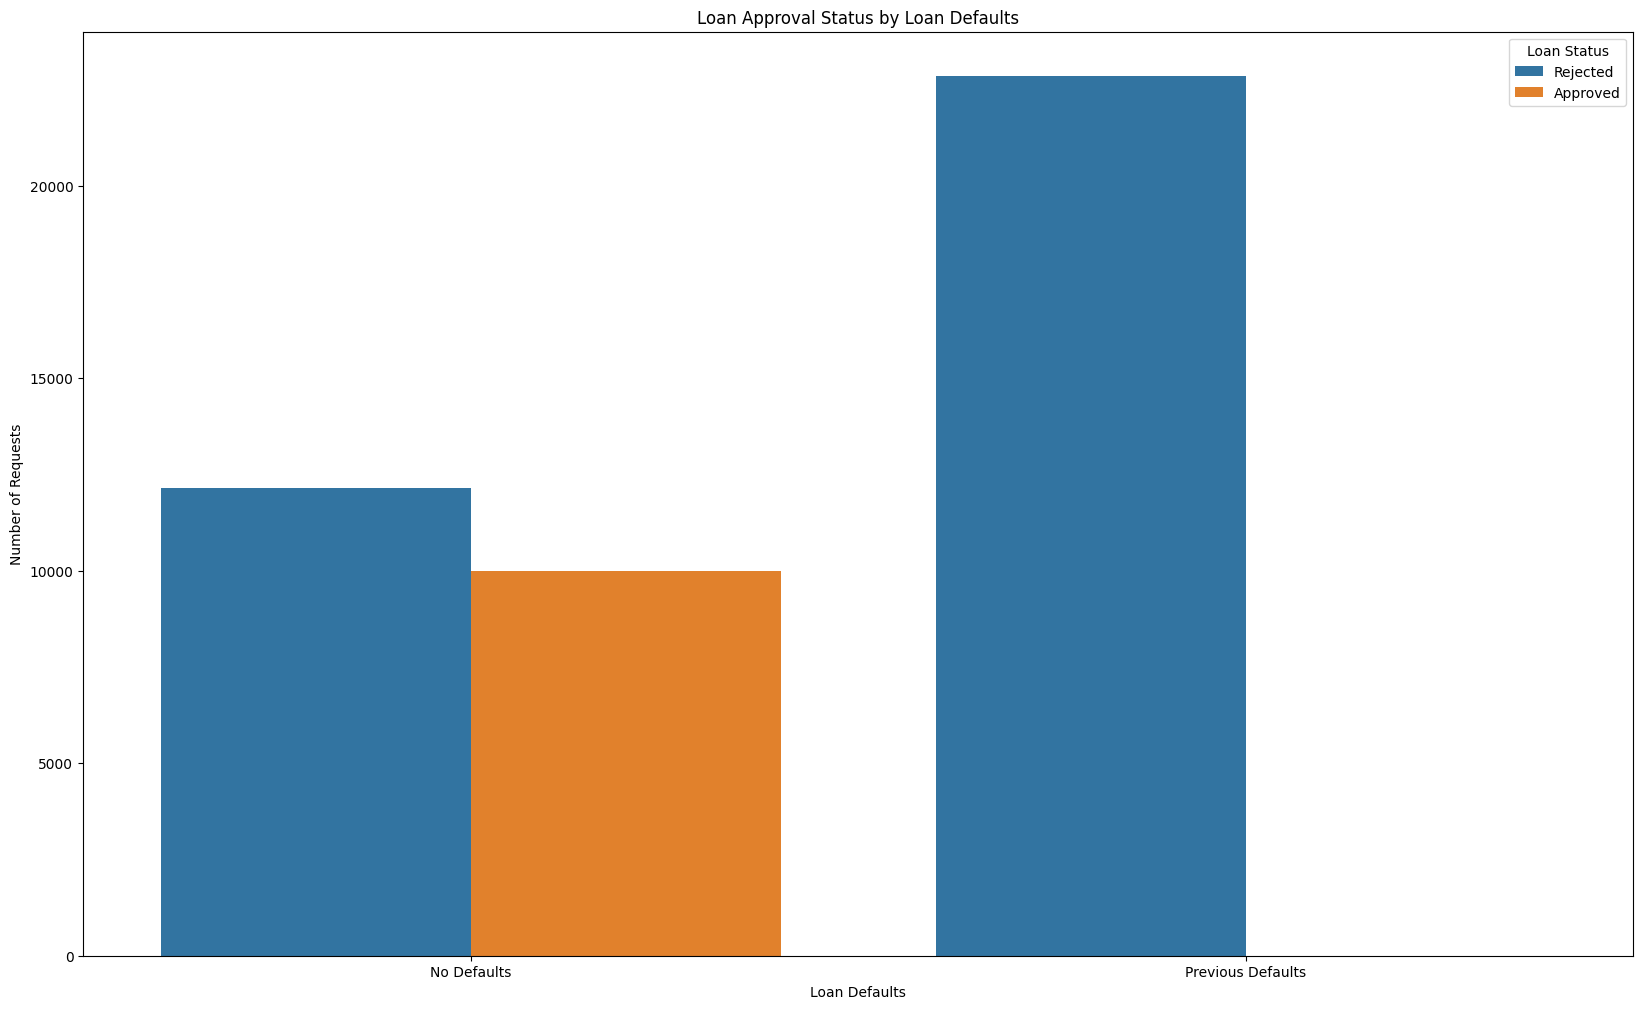

In [ ]:
# Plot the distribution of loan approval status based on previous_loan_defaults
plt.figure(figsize=(20, 12))
sns.countplot(data=loan_approval_df, x='previous_loan_defaults', hue='loan_status')
plt.title('Loan Approval Status by Loan Defaults')
plt.xlabel('Loan Defaults')
plt.xticks([0, 1], ['No Defaults', 'Previous Defaults'], rotation=0)
plt.ylabel('Number of Requests')
labels = ['Rejected', 'Approved']
plt.legend(labels, title='Loan Status', loc='upper right')
plt.show()

## Part 5: Export Clean Dataframe to new CSV file

In [ ]:
# Save the dataframe to a new csv file
loan_approval_df.to_csv("clean_loan_data.csv", index=False)

## Part 6: Pearson Correlation and Feature Importance

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_columns = ['gender', 'education', 'home_ownership_status', 'loan_intent']

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(loan_approval_df[categorical_columns])

# Create a dataframe with the encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns with the original dataframe
df_sklearn_encoded = pd.concat([loan_approval_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

print(f"One-Hot Encoded DataFrame:\n{df_sklearn_encoded}")

One-Hot Encoded DataFrame:
          id  age  annual_income  years_of_employment  loan_amnt  \
0          1   22        71948.0                    0    35000.0   
1          2   21        12282.0                    0     1000.0   
2          3   25        12438.0                    3     5500.0   
3          4   23        79753.0                    0    35000.0   
4          5   24        66135.0                    1    35000.0   
...      ...  ...            ...                  ...        ...   
44995  44996   27        47971.0                    6    15000.0   
44996  44997   37        65800.0                   17     9000.0   
44997  44998   33        56942.0                    7     2771.0   
44998  44999   29        33164.0                    4    12000.0   
44999  45000   24        51609.0                    1     6665.0   

       loan_int_rate  loan_percent_income  years_of_credit_hist  credit_score  \
0              16.02                 0.49                   3.0           5

In [ ]:
# Find the pearson correlations matrix
corr = df_sklearn_encoded.corr(method = 'pearson')
corr

,id,age,annual_income,years_of_employment,loan_amnt,loan_int_rate,loan_percent_income,years_of_credit_hist,credit_score,previous_loan_defaults,...,home_ownership_status_MORTGAGE,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
id,1.000000,0.409465,0.075725,0.358195,0.058472,0.018129,-0.006863,0.443000,0.066340,-0.027482,...,0.045504,-0.021155,-0.066041,-0.009933,-0.002979,-0.030044,0.022902,0.024283,0.003056,-0.011993
age,0.409465,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.025917,...,0.039221,-0.007321,-0.003848,-0.035974,-0.004285,-0.082782,0.068081,0.016351,0.026834,-0.006695
annual_income,0.075725,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,0.061483,...,0.220666,0.007086,-0.039185,-0.198627,0.001562,-0.016048,0.037863,-0.041573,0.015143,0.012847
years_of_employment,0.358195,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.029231,...,0.035252,-0.004535,0.000490,-0.034499,-0.007188,-0.072846,0.058164,0.016102,0.026863,-0.006156
loan_amnt,0.058472,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,-0.059009,...,0.149924,0.013738,-0.025290,-0.136521,-0.002396,-0.006062,0.045657,-0.034140,0.001476,0.005500
loan_int_rate,0.018129,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,-0.181800,...,-0.125839,0.017592,-0.015953,0.130044,0.004380,-0.017332,0.022505,0.012609,-0.004051,-0.013177
loan_percent_income,-0.006863,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,-0.203252,...,-0.155019,0.011520,0.052900,0.125282,-0.001530,-0.001033,-0.015604,0.020547,-0.007713,0.001601
years_of_credit_hist,0.443000,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.022640,...,0.029443,-0.006692,-0.000855,-0.027891,-0.006147,-0.070653,0.054821,0.013298,0.027952,-0.004942
credit_score,0.066340,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.183005,...,0.007087,-0.004865,-0.002891,-0.005051,-0.009092,-0.015508,0.010228,0.003359,0.003795,0.009705
previous_loan_defaults,-0.027482,-0.025917,0.061483,-0.029231,-0.059009,-0.181800,-0.203252,-0.022640,-0.183005,1.000000,...,0.114778,-0.010851,0.053156,-0.138273,-0.045529,0.038725,-0.021713,-0.034562,0.004153,0.052122


Correlation values for 'loan_status'

In [ ]:
# Extract the correlation values for 'loan_status' and sort them in descending order
loan_status_corr = corr['loan_status'].sort_values(ascending=False)

# Display the most correlated features with 'loan_status'
print(loan_status_corr.drop('loan_status'))

loan_percent_income               0.384880
loan_int_rate                     0.332005
home_ownership_status_RENT        0.255239
loan_amnt                         0.107714
loan_intent_DEBTCONSOLIDATION     0.084130
loan_intent_MEDICAL               0.065195
id                                0.037548
loan_intent_HOMEIMPROVEMENT       0.033838
home_ownership_status_OTHER       0.013645
education_Bachelor                0.004728
education_Doctorate               0.001833
education_High School             0.001277
gender_F                          0.000561
gender_M                         -0.000561
education_Associate              -0.002765
education_Master                 -0.004741
credit_score                     -0.007647
years_of_credit_hist             -0.014851
years_of_employment              -0.020481
age                              -0.021476
loan_intent_PERSONAL             -0.022488
loan_intent_EDUCATION            -0.064006
loan_intent_VENTURE              -0.085992
home_owners